<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/Industry_ML_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [485]:
# Very basic libraries to work with numpy and import data from Google drive 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [486]:
from google.colab import drive # to import Google drive
drive.mount('/content/drive') # mounting Google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [487]:
cd /content/drive/"My Drive/Colab Notebooks/industry" 

/content/drive/My Drive/Colab Notebooks/industry


In [488]:
dataset = pd.read_csv("Train.csv") # Assigning data to a variable called “dataset”. 
print(dataset)#printing dataset

                  area_type   availability  ... balcony   price
0      Super built-up  Area         19-Dec  ...     1.0   39.07
1                Plot  Area  Ready To Move  ...     3.0  120.00
2            Built-up  Area  Ready To Move  ...     3.0   62.00
3      Super built-up  Area  Ready To Move  ...     1.0   95.00
4      Super built-up  Area  Ready To Move  ...     1.0   51.00
...                     ...            ...  ...     ...     ...
13315        Built-up  Area  Ready To Move  ...     0.0  231.00
13316  Super built-up  Area  Ready To Move  ...     NaN  400.00
13317        Built-up  Area  Ready To Move  ...     1.0   60.00
13318  Super built-up  Area         18-Jun  ...     1.0  488.00
13319  Super built-up  Area  Ready To Move  ...     1.0   17.00

[13320 rows x 9 columns]


In [489]:
dataset.shape  # finding shape (size) of dataset

(13320, 9)

In [490]:
dataset.describe() #finding information from dataset this will only show details for numerical data

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [491]:
dataset.columns #finding columns names of dataset

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

Now we find out the columns names of the dataset, so based on that we will find out information for different columns present in the dataset.

In [492]:
# count of flats with different areas type
dataset['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

As we can see in above output that there are total 4 types of area detail availbel whixh is plot Area, Carpet Area, Build-Up Area and Super Build-Up area.

In [493]:
# removing unnecessary columns like , area type, availability ,balcony type 
dataset2 = dataset.drop(['area_type','society','balcony','availability'],axis='columns')


In [494]:
# dataset shape before and after of removing  unnecessary columns
print(dataset.shape)
print(dataset2.shape)  # finding shape of data after droping some columns

(13320, 9)
(13320, 5)


Data cleaning 

In [495]:
#first step in data-cleaing is to find null values and remove it 
dataset2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

we can see that size of house and bath columns is having maximum Null values

In [496]:
dataset3 = dataset2.dropna() # removing NULL values

In [497]:
# there will be no null values now
dataset3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [498]:
#dataset shape before and after droping null values
print(dataset2.shape)
print(dataset3.shape)

(13320, 5)
(13246, 5)


In [499]:
dataset3['size'].unique() # finding unique value present in size column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

now as we know that size columns contains string type data also we need only number of bedrooms so will create another column which contain integer value of size

In [500]:
dataset3['size_bhk'] = dataset3['size'].apply(lambda x: int(x.split(' ')[0])) # spliting data and taking integet value in column 'size_bhk'
dataset3.size_bhk.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [501]:
type(dataset3['total_sqft']) 

pandas.core.series.Series

Now dataset contains total sqft details of house which is in string format so we need to convert it into the float format so that we can compupte it.

In [502]:
def str_to_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [503]:
#dataset3[~dataset3['total_sqft'].apply(str_to_float)]

there are some data which contains '-' character so we need to remove it and add new value by averaging the other values

In [504]:
# function which will remove '-'  from dataset
def remove_for_sqft(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [505]:
dataset4 = dataset3.copy()
dataset4.total_sqft = dataset4.total_sqft.apply(remove_for_sqft)
dataset4 = dataset4[dataset4.total_sqft.notnull()]
dataset4

,location,size,total_sqft,bath,price,size_bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


Now we have to find-out price per square feet for any house and add new column for the same

In [506]:
dataset4[~dataset4['price'].apply(str_to_float)]
print(dataset4)

                       location       size  total_sqft  bath   price  size_bhk
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00         3
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00         3
4                      Kothanur      2 BHK      1200.0   2.0   51.00         2
...                         ...        ...         ...   ...     ...       ...
13315                Whitefield  5 Bedroom      3453.0   4.0  231.00         5
13316             Richards Town      4 BHK      3600.0   5.0  400.00         4
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00         2
13318           Padmanabhanagar      4 BHK      4689.0   4.0  488.00         4
13319              Doddathoguru      1 BHK       550.0   1.0   17.00         1

[13200 rows x 6 columns]


In [507]:
dataset5 = dataset4.copy()
dataset5['price_per_sqft'] = dataset5['price']*100000  # price/sqft considring price in lakhs
dataset5['price_per_sqft'] = dataset5['price_per_sqft']/dataset5['total_sqft'] 
dataset5.head() 

,location,size,total_sqft,bath,price,size_bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [508]:
dataTypeSeries = dataset5.dtypes
dataTypeSeries #checking datatype if need to convert 

location           object
size               object
total_sqft        float64
bath              float64
price             float64
size_bhk            int64
price_per_sqft    float64
dtype: object

Now will try to describe data of location

In [509]:
# total unique records for location
len(dataset5.location.unique())

1298

finding number of house in every area 

In [510]:
dataset5.location = dataset5.location.apply(lambda x: x.strip())
location_stats = dataset5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

We are having more then 1287 diffrent location in our dataset and for regression we are going to apply one hot endoing technique so if we directly apply on present dataset then will be having toomuch large number of columns so will merge some of the classes and commanly call it as 'others'

In [511]:
dataset5.location = dataset5.location.apply(lambda x: x.strip())
location_stats = dataset5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [512]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Dodsworth Layout        10
BTM 1st Stage           10
Sadashiva Nagar         10
Thyagaraja Nagar        10
Kalkere                 10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [513]:
dataset5.location = dataset5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(dataset5.location.unique())

241

In [514]:
# there are some data which has value of BHK(size) very big so will try to not include those data
dataset6 = dataset5[~(dataset5.total_sqft/dataset5.size_bhk<300)]
dataset6.shape

(12456, 7)

Text(0, 0.5, 'Count')

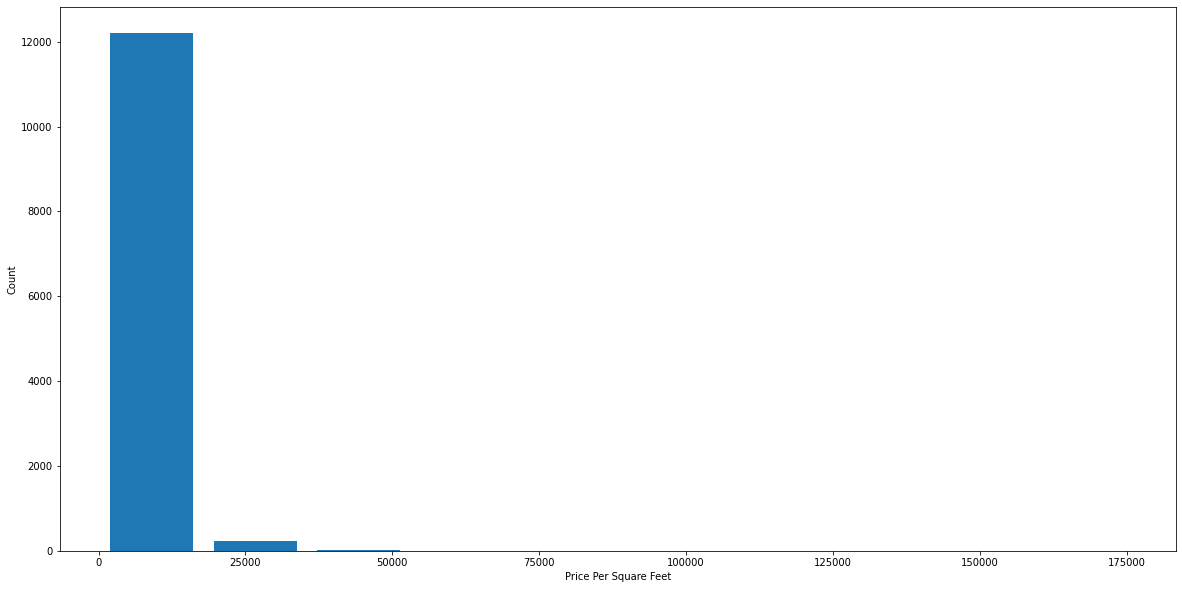

In [515]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(dataset6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

As we know we are having many diffrent classes for location so will use one hot encoding for location.

In [516]:
dummies = pd.get_dummies(dataset6.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [517]:
dataset6 = pd.concat([dataset6,dummies],axis='columns')
dataset6.head()


,location,size,total_sqft,bath,price,size_bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [518]:
dataset7 = dataset6.drop('location',axis='columns')
dataset7 = dataset7.drop('size',axis='columns')

Building of model

In [519]:
X = dataset7.drop(['price'],axis='columns')
y = dataset7.price
print("X_shape", X.shape)
print("y_shape", y.shape)

X_shape (12456, 245)
y_shape (12456,)


In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_test,y_test)

0.7926222597511906

we can see that we are getting 79% accuracy score for this model